In [1]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

In [26]:
#resolution
NSIDE = 512
npix = hp.nside2npix(NSIDE)

raw_data =[hp.read_map('../CMB_maps/LFI_SkyMap_030_1024_R2.01_full.fits'),
        hp.read_map('../CMB_maps/LFI_SkyMap_044_1024_R2.01_full.fits'), 
        hp.read_map('../CMB_maps/LFI_SkyMap_070_1024_R2.01_full.fits'),
        hp.read_map('../CMB_maps/HFI_SkyMap_100_2048_R2.02_full.fits'),
        hp.read_map('../CMB_maps/HFI_SkyMap_143_2048_R2.02_full.fits'),
        hp.read_map('../CMB_maps/HFI_SkyMap_217_2048_R2.02_full.fits'),
        hp.read_map('../CMB_maps/HFI_SkyMap_353_2048_R2.02_full.fits'),
        hp.read_map('../CMB_maps/HFI_SkyMap_545_2048_R2.02_full.fits')*0.00010958025,
        hp.read_map('../CMB_maps/HFI_SkyMap_857_2048_R2.02_full.fits')*0.00004431631]
maps =[]
for i in range(9):
    maps.append(hp.pixelfunc.ud_grade(raw_data[i], NSIDE, order_in='RING'))
    
freq = [30,44,70,100,143,217,353,545,857]

conv_factors = [0.0032548074,0.0015916707 ,0.00069120334,0.00026120163, 0.00010958025,0.00004431631]

NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


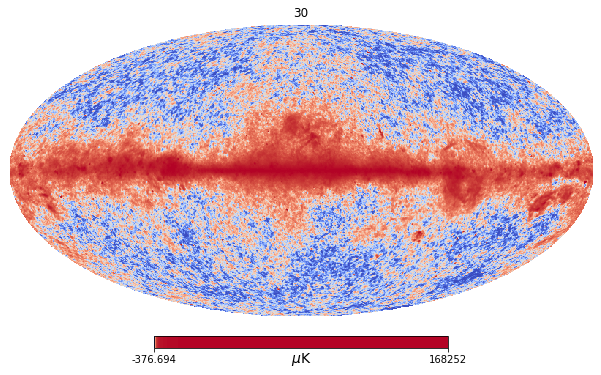

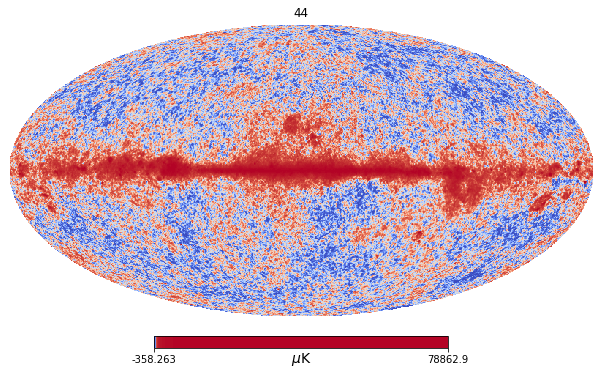

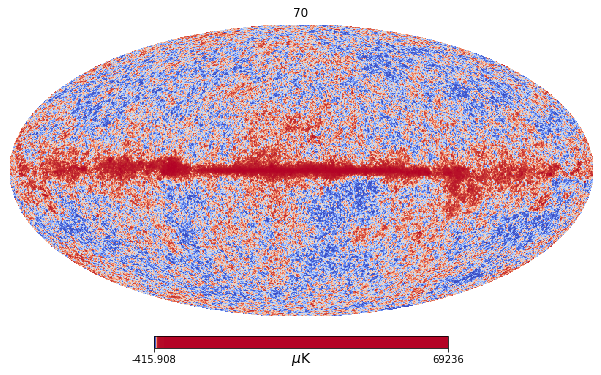

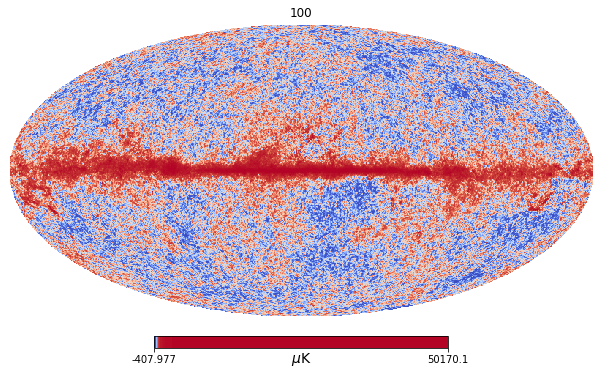

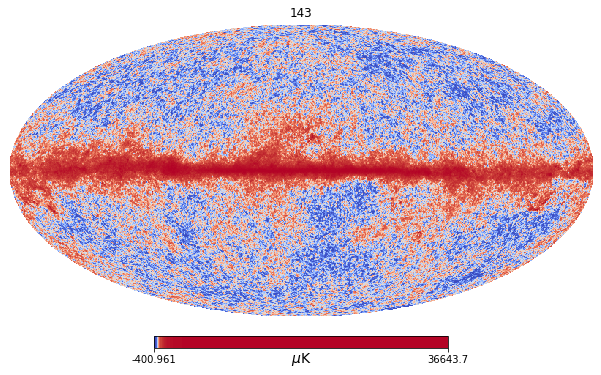

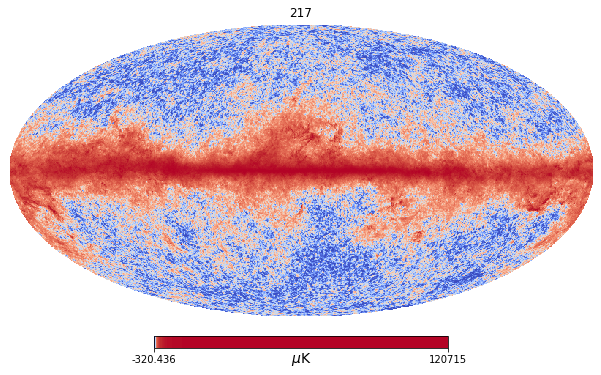

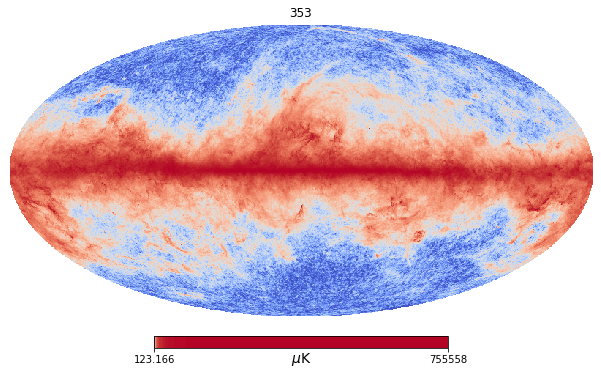

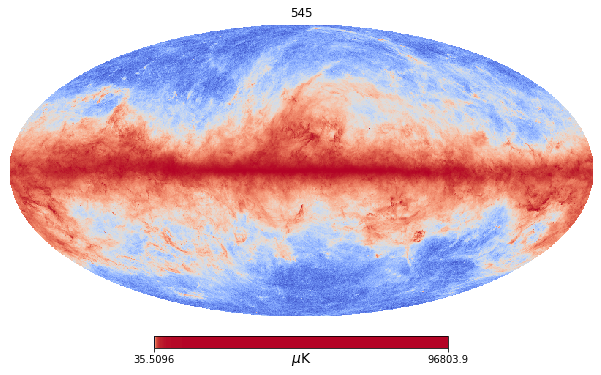

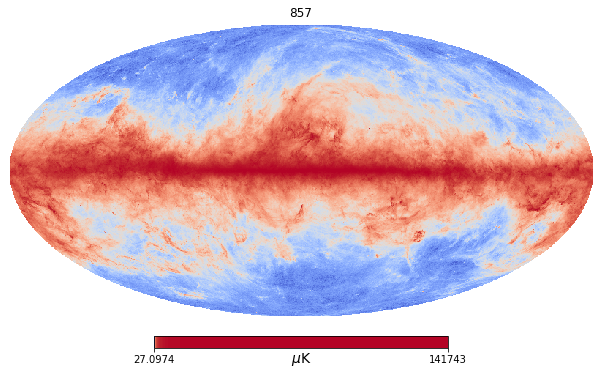

In [27]:
for i in range(9) :
    hp.mollview(maps[i]*1e6,norm = 'hist', title = str(freq[i]), unit = '$\mu$K', cmap ='coolwarm')

In [57]:
def splitting(regions, data_map):
    'function that takes in the splitting regions (this array must be in the format value,rel_range,abs_range) and data maps and returns an array of regions cut out from the initial map as well as the boolean map'
    value, rel_range, abs_range = regions
    
    cut_map = [] #cut out pieces of original data map
    bool_map = [] #entire map as bool values indicating whether a value is contained on a piece of a map or not
    size = [] #size of cut-out region
    
    for i in range(len(value)):
        bool_map.append(hp.pixelfunc.mask_bad(data_map, badval=value[i], rtol=rel_range[i], atol=abs_range[i]))
        cut_map.append(data_map[bool_map[i] == True])
        size.append(len(cut_map))
    
    if (np.sum(size) != len(data_map)):
        print('Error: a pixel on a boundary was excluded or included in two or more regions, try changing the absolute tolerance')
         
    else:
        return cut_map, bool_map

In [58]:
print(maps[3].shape)
bool_map = hp.pixelfunc.mask_bad(maps[3], badval=0.0001, rtol=2e-4, atol=1e-6)
maps[3][bool_map == True]

(3145728,)


array([9.92958868e-05, 1.00512877e-04, 9.92755183e-05, ...,
       1.00327783e-04, 1.00537102e-04, 1.00069916e-04])